## **Wargame:Tank Identifier**

60 points



Our Goal for the project is to be able to take images of an enemy tank in Wargames: Airland Battle, put them into our program in real-time, and have the program return what tank it is and what tanks we should use to combat the enemy’s forces. The target audience of this project would be players of the game or any war game enthusiast. On a larger scale, there are also real-life applications to the general idea of this project. Being able to take data from the enemy’s forces and put it in a machine learning algorithm that returns a blueprint for a counterattack. However, this also provides an ethical challenge to the project as war carries many ethical challenges with it. We believe confining the project to a video game will help us stay inside a good ethical boundary.

During this project, it was rendered overly ambitious to classify 37 different tanks, so instead it was decided tanks would be classifed as PACT or NATO instead without classifying the tank itself.

### **General Steps**
1 - Create a program to automate image collection for tanks

2 - Create a dataset of images and tank data

3 - Train model with data, refine accuracy over time

4 - Check model accuracy and test model with new data

5 - Make model portable, have results reference tank CSV file and present better tank, Present solution

### **Step 1 -** **Import libraries** and download model images


In [1]:
import os
import tensorflow as tf
print(tf.test.gpu_device_name())

from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array
from shutil import copyfile
import matplotlib.pyplot as plt
from google.colab import files
from keras.preprocessing import image
import numpy as np
import random

/device:GPU:0


### **Step 2 -** **Download tank images (included) and tank statistics (not included... yet) data sets**


In [2]:
import zipfile
# Stored using the wonders of git lfs
!wget -O Images.zip https://github.com/Retr0r0cket/Wargame-Tank-Identifier/blob/main/Images.zip?raw=true

local_zip = './Images.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('')
zip_ref.close()

WARSAW_PACT_COUNTRIES = ('Soviet Union', 'GDR', 'Poland', 'Czechoslovakia')
NATO_COUNTRIES = ('United States', 'France', 'United Kingdom', 'FRG', 'Canada', 'Denmark', 'Norway', 'Sweden')

DIR = './Images'
DIRList = []

--2024-01-05 03:37:12--  https://github.com/Retr0r0cket/Wargame-Tank-Identifier/blob/main/Images.zip?raw=true
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/Retr0r0cket/Wargame-Tank-Identifier/raw/main/Images.zip [following]
--2024-01-05 03:37:12--  https://github.com/Retr0r0cket/Wargame-Tank-Identifier/raw/main/Images.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/Retr0r0cket/Wargame-Tank-Identifier/main/Images.zip [following]
--2024-01-05 03:37:12--  https://media.githubusercontent.com/media/Retr0r0cket/Wargame-Tank-Identifier/main/Images.zip
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubuserco

### **Step 2 -** **Take screen shots and grap them from clip board and put them into a folder**

37 Tanks * 15 Images = 555 Images and a lot of script crashes. Only run this when sampling images


In [ ]:
from PIL import ImageGrab, ImageShow, Image
from time import sleep

# Polls clipboard every 0.25 seconds, needed to speed it up as eventually I was doing it in under one second sometimes and causing issues
def clipboardGrab(img):
    while True:
        sleep(0.25)
        newImg = ImageGrab.grabclipboard()
        if newImg != img:
            return newImg

# Goes through each tank (inputed manually) in each country in each faction
for faction in ['NATO', 'PACT']:
    if faction == 'NATO':
        countries = NATO_COUNTRIES
    else:
        countries = WARSAW_PACT_COUNTRIES
    for country in countries:
        for tank in range(int(input(f"Number of tanks for {country}: "))):
            tankName = input("Tank model: ")
            directory = f"{DIR}/{faction}/{country}/{tankName}"
            DIRList.append(directory)
            try:
                os.makedirs(directory)
            except:
                pass
            # Gets current image to make sure anything grabbed from clipboard is new, put this before getting number of images as sometimes I took one before saying how many tanks by accident
            img = ImageGrab.grabclipboard()
            numOfTanks = int(input("Number of images: "))
            for image_num in range(numOfTanks):
                img = clipboardGrab(img)
                # Saves image to correct directory
                img.save(f"{directory}/{tankName}_{image_num}.png", 'PNG')
                # Confirmation
                print(f"Image {image_num + 1}/{numOfTanks} saved")

Number of tanks for United States: 0
Number of tanks for France: 0
Number of tanks for United Kingdom: 


ValueError: ignored

# 2.1
If not running previous code and downloading files, run this script

In [3]:
for faction in ['NATO', 'PACT']:
    if faction == 'NATO':
        countries = NATO_COUNTRIES
    else:
        countries = WARSAW_PACT_COUNTRIES
    for country in countries:
        for tank in os.listdir(f"{DIR}/{faction}/{country}"):
          DIRList.append(f"{DIR}/{faction}/{country}/{tank}")

print(DIRList)

['./Images/NATO/United States/M60A1 USMC', './Images/NATO/United States/M60A2E1 Starship', './Images/NATO/United States/M60A1 Rise Patton', './Images/NATO/France/AMX-30B', './Images/NATO/France/AMX-30', './Images/NATO/France/AMX-13 Harpon', './Images/NATO/United Kingdom/Chieftan Mk.2', './Images/NATO/United Kingdom/Chieftan Mk.5', './Images/NATO/United Kingdom/Scorpion Light Tank', './Images/NATO/FRG/Leopard 1A4', './Images/NATO/FRG/Leopard 1A3', './Images/NATO/FRG/Leopard 1A2', './Images/NATO/FRG/KPz M48A2G', './Images/NATO/FRG/Leopard 1A1', './Images/NATO/Canada/Centurion Mk.11', './Images/NATO/Canada/Centurion Mk.5', './Images/NATO/Canada/Centurion Mk.6', './Images/NATO/Denmark/Centurion 105mm', './Images/NATO/Denmark/Centurion 84mm', './Images/NATO/Norway/M48A1', './Images/NATO/Sweden/STRV 102', './Images/NATO/Sweden/STRV 103B', './Images/PACT/Soviet Union/T-62', './Images/PACT/Soviet Union/T-64A', './Images/PACT/Soviet Union/T-55', './Images/PACT/Soviet Union/T-72', './Images/PACT

###**Step 2.5: Validate Images (Bonus)**###
Didn't need to do this we I took them ourselves and made sure they were valid images by checking over them, but just in case. Meant to be done before uploading of images

Also designed around evaluating each tank seperatley, but not enough time so had to settle for NATO vs PACT

In [4]:
import cv2

bad_list=[]

warsaw_pact_file_list = []
nato_file_list = []

# Remove invalid images
for directory in DIRList:
  # you only need to keep track of if the countries are in one faction
  in_warsaw_pact = False

  for country in WARSAW_PACT_COUNTRIES:
    if country in directory:
      in_warsaw_pact = True
      break

  file_list=os.listdir(directory) # create list of files in directory
  for f in file_list: # iterate through the files
    fpath=os.path.join (directory,f)
    if os.path.isfile(fpath):
      index=f.rfind('.') # find index of period infilename
      ext=f[index+1:] # get the files extension
      if ext not in ['jpg', 'jpeg', 'png', 'bmp', 'gif']:
        # print(f'file {fpath}  has an invalid extension {ext}')
        bad_list.append(fpath)
      else:
        try:
          img=cv2.imread(fpath)
          size=img.shape
        except:
          # print(f'file {fpath} is not a valid image file ')
          bad_list.append(fpath)
      if in_warsaw_pact is False:
          nato_file_list.append(fpath)
      else:
          warsaw_pact_file_list.append(fpath)

for image in bad_list:
    os.remove(image)

nato_num_of_images = len(nato_file_list)
warsaw_pact_num_of_images = len(warsaw_pact_file_list)
print(nato_num_of_images)
print(warsaw_pact_num_of_images)

# Makes sure image count is equal between both dirs for training purposes
min_length = min(nato_num_of_images, warsaw_pact_num_of_images)
print(min_length)

if min_length == warsaw_pact_num_of_images:
  for random_file in sorted(random.sample(range(nato_num_of_images), nato_num_of_images-min_length), reverse=True):
    os.remove(nato_file_list[random_file])
    nato_file_list.pop(random_file)
else:
  for random_file in sorted(random.sample(range(warsaw_pact_num_of_images), warsaw_pact_num_of_images-min_length), reverse=True):
    os.remove(warsaw_pact_file_list[random_file])
    warsaw_pact_file_list.pop(random_file)

# Confirmation
print(f"Warsaw Pact: {len(warsaw_pact_file_list)} images")
print(f"Nato: {len(nato_file_list)} images")

331
210
210
Warsaw Pact: 210 images
Nato: 210 images


### **Step 3 - Create the training and validation set from images**


In [5]:
img_height = 224
img_width = 224
batch_size = 250
train_data_dir = './Images'
train_datagen = ImageDataGenerator(rescale=1./255.,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    validation_split = 0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    train_data_dir, # same directory as training data
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'validation') # set as validation data

Found 336 images belonging to 2 classes.
Found 84 images belonging to 2 classes.


### **Step 4 - Print five images from each training and validation datasets**



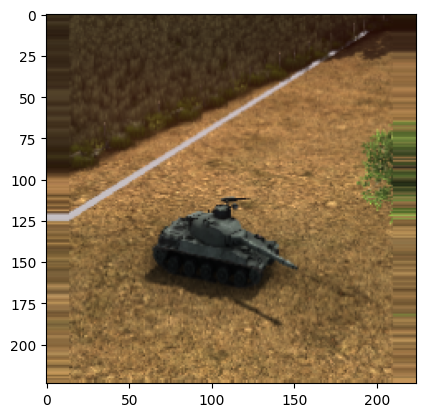

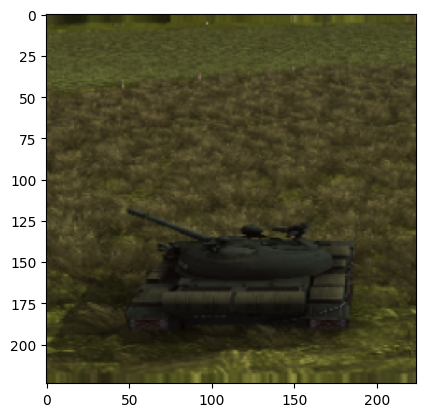

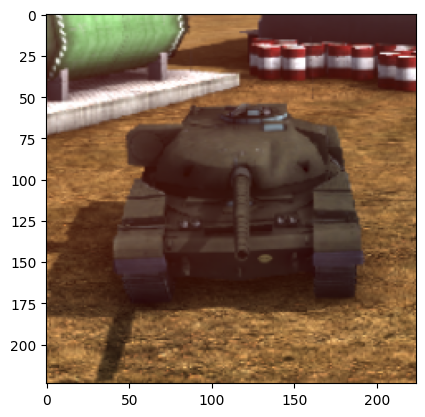

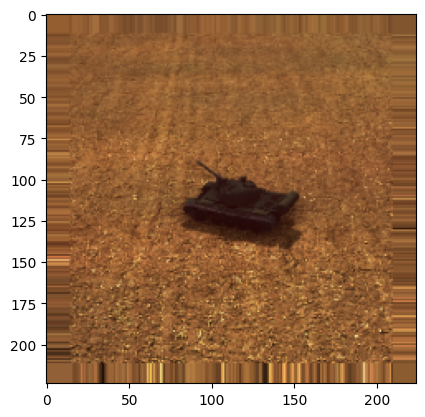

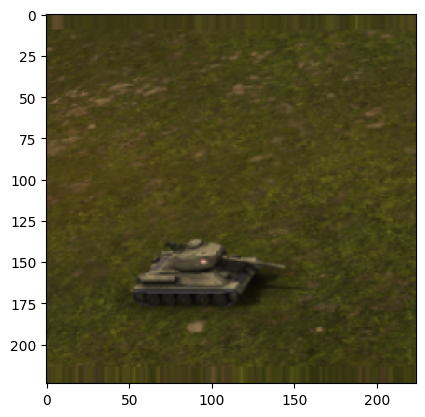

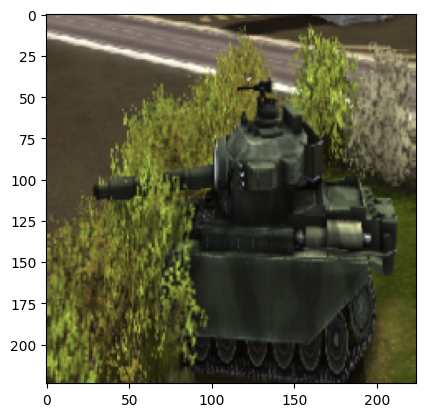

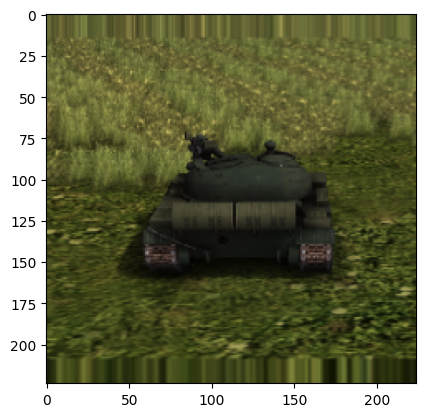

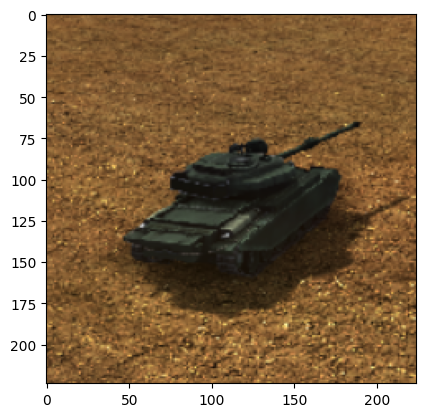

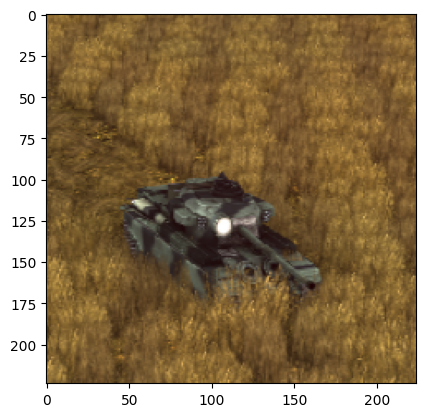

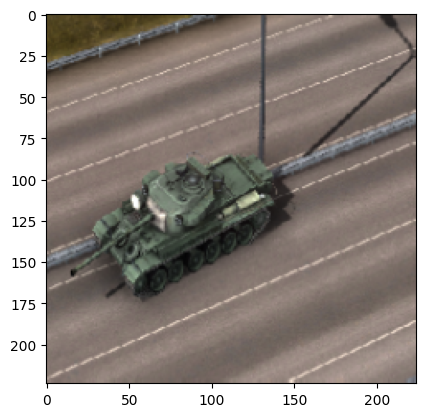

In [6]:
# Prints training dataset images
group1, group2 = next(train_generator)
for i in range(5):
  img = group1[i]
  plt.imshow(img)
  plt.show()

# prints validation dataset images
group3, group4 = next(validation_generator)
for i in range(5):
  img = group3[i]
  plt.imshow(img)
  plt.show()

### **Step 5 - Load the existing VGG16 model and print model summary**



In [7]:
from keras.applications.vgg16 import VGG16

model = VGG16()
model.summary()

553467096/553467096 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

### **Step 6 - Define and compile our version of the model and print model summary**



In [8]:
import sys
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator


# Define CNN model
def define_model():
  # load model
  model = VGG16(include_top=False, input_shape=(224, 224, 3))
  # mark loaded layers as not trainable
  for layer in model.layers:
     layer.trainable = False
  # Stacking a new simple convolutional network on top of it
  x = Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(model.layers[-1].output)
  x = MaxPooling2D(pool_size=(2, 2))(x)
  x = Flatten()(x)
  x = Dense(256, activation='relu')(x)
  x = Dropout(0.5)(x)

  # need to check student
  # the 3 represents how many categories 3 is 1 for horse, 1 for cat, 1 for dog
  x = Dense(2, activation='softmax')(x)

  # Creating new model. Please note that this is NOT a Sequential() model.
  from keras.models import Model
  custom_model = Model(inputs=model.inputs, outputs=x)
  custom_model.compile(loss='categorical_crossentropy',
                     optimizer='rmsprop',
                     metrics=['accuracy'])
  return custom_model

model = define_model()
model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

### **Step 7 - Plot learning curves so we can analyze loss and accuracy**


In [9]:
def summarize_diagnostics(history):
	# plot loss
	plt.subplot(211)
	plt.title('Cross Entropy Loss')
	plt.plot(history.history['loss'], color='blue', label='train')
	plt.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	plt.subplot(212)
	plt.title('Classification Accuracy')
	plt.plot(history.history['accuracy'], color='blue', label='train')
	plt.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	plt.savefig(filename + '_plot.png')
	plt.show()
	plt.close()

### **Step 8 - Train and save our version of the model**


In [11]:
history = model.fit(train_generator, steps_per_epoch=len(train_generator),
		validation_data=validation_generator, validation_steps=len(validation_generator), epochs=15, verbose=1)

Epoch 1/15
2/2 [==============================] - 11s 9s/step - loss: 0.6857 - accuracy: 0.5387 - val_loss: 0.6337 - val_accuracy: 0.6190
Epoch 2/15
2/2 [==============================] - 10s 4s/step - loss: 0.6465 - accuracy: 0.6310 - val_loss: 0.6055 - val_accuracy: 0.6667
Epoch 3/15
2/2 [==============================] - 10s 5s/step - loss: 0.6044 - accuracy: 0.7083 - val_loss: 0.5701 - val_accuracy: 0.7262
Epoch 4/15
2/2 [==============================] - 10s 8s/step - loss: 0.5861 - accuracy: 0.7262 - val_loss: 0.5229 - val_accuracy: 0.7619
Epoch 5/15
2/2 [==============================] - 10s 3s/step - loss: 0.5722 - accuracy: 0.7202 - val_loss: 0.6291 - val_accuracy: 0.5595
Epoch 6/15
2/2 [==============================] - 11s 9s/step - loss: 1.1291 - accuracy: 0.4762 - val_loss: 0.8260 - val_accuracy: 0.5000
Epoch 7/15
2/2 [==============================] - 10s 9s/step - loss: 0.6689 - accuracy: 0.6488 - val_loss: 0.5943 - val_accuracy: 0.6667
Epoch 8/15
2/2 [==================

### **Step 9 - Print the accuracy of our version of the model**


In [12]:
_, acc = model.evaluate(validation_generator, steps=len(validation_generator), verbose=0)
print('> %.3f' % (acc * 100.0))

> 76.190


### **Step 10 - Summarize the performance of our model**



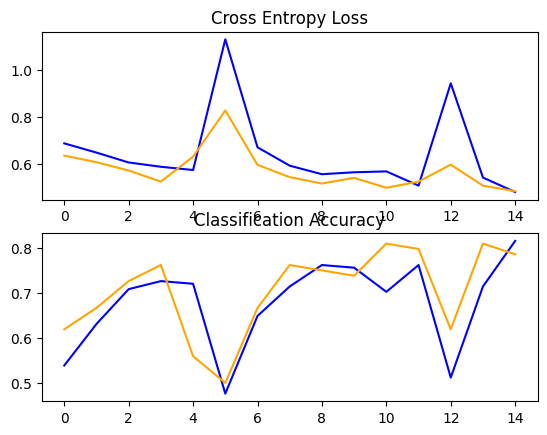

In [13]:
summarize_diagnostics(history)

### **Step 11 - Check if our model categorizes correctly by uploading three test images and showing results**




Saving Centurion 105mm_2.png to Centurion 105mm_2.png
Saving KPz T-55_2.png to KPz T-55_2.png
Saving M60A2E1 Starship_0.png to M60A2E1 Starship_0.png


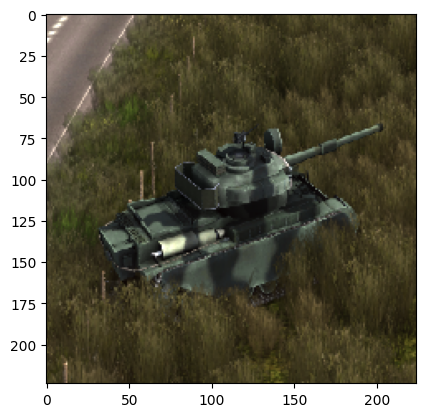

1/1 [==============================] - 1s 1s/step
NATO tank


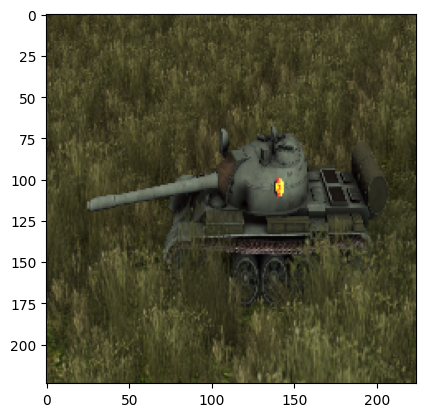

1/1 [==============================] - 0s 45ms/step
NATO tank


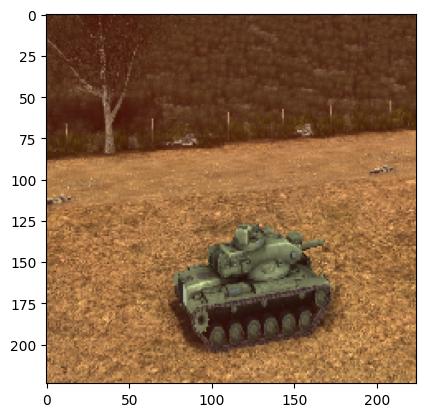

1/1 [==============================] - 0s 32ms/step
NATO tank


In [14]:
uploaded = files.upload()

for fn in uploaded.keys():
  # predicting images
  path = '/content/' + fn
  img = load_img(path, target_size=(224, 224))
  plt.imshow(img)
  plt.show()

  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  NATO, PACT = classes[0]    # unpacking the classes list

  # print(round(NATO))
  # print(round(PACT))

  if NATO == 1:
    print("NATO tank")
  elif PACT == 1:
    print("PACT tank")
  else:
    print("¯\_(ツ)_/¯")